In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


fecha_dato	The table is partitioned for this column
ncodpers	Customer code
ind_empleado	Employee index: A active, B ex employed, F filial, N not employee, P pasive
pais_residencia	Customer's Country residence
sexo	Customer's sex
age	Age
fecha_alta	The date in which the customer became as the first holder of a contract in the bank
ind_nuevo	New customer Index. 1 if the customer registered in the last 6 months.
antiguedad	Customer seniority (in months)
indrel	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
ult_fec_cli_1t	Last date as primary customer (if he isn't at the end of the month)
indrel_1mes	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
tiprel_1mes	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
indresi	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
indext	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
conyuemp	Spouse index. 1 if the customer is spouse of an employee
canal_entrada	channel used by the customer to join
indfall	Deceased index. N/S
tipodom	Addres type. 1, primary address
cod_prov	Province code (customer's address)
nomprov	Province name
ind_actividad_cliente	Activity index (1, active customer; 0, inactive customer)
renta	Gross income of the household
segmento	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
ind_ahor_fin_ult1	Saving Account
ind_aval_fin_ult1	Guarantees
ind_cco_fin_ult1	Current Accounts
ind_cder_fin_ult1	Derivada Account
ind_cno_fin_ult1	Payroll Account
ind_ctju_fin_ult1	Junior Account
ind_ctma_fin_ult1	Más particular Account
ind_ctop_fin_ult1	particular Account
ind_ctpp_fin_ult1	particular Plus Account
ind_deco_fin_ult1	Short-term deposits
ind_deme_fin_ult1	Medium-term deposits
ind_dela_fin_ult1	Long-term deposits
ind_ecue_fin_ult1	e-account
ind_fond_fin_ult1	Funds
ind_hip_fin_ult1	Mortgage
ind_plan_fin_ult1	Pensions
ind_pres_fin_ult1	Loans
ind_reca_fin_ult1	Taxes
ind_tjcr_fin_ult1	Credit Card
ind_valo_fin_ult1	Securities
ind_viv_fin_ult1	Home Account
ind_nomina_ult1	Payroll
ind_nom_pens_ult1	Pensions
ind_recibo_ult1	Direct Debit

In [2]:

data = pd.read_csv('train_ver2.csv',delimiter=',')
data.info()

data.tail(2)

#data.describe()

/Users/aliceperse/Documents/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
data_temp = data.iloc[:,24:]
data_temp.head(1)

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
data_product = data_temp.values


In [5]:
# do we need data cleaning
data.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [6]:
limit_rows = 700000
data2 = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids = pd.Series(data2["ncodpers"].unique())

/Users/aliceperse/Documents/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#for plotting we need to limit rows
lim = 13647308/2
print lim
lim_id = data2["ncodpers"].unique().size/2
print lim_id

6823654
312793


In [8]:
#looking at the age
unique_ids = pd.Series(data2["ncodpers"].unique())
unique_id = unique_ids.sample(n=lim_id)
data_cut = data2[data2.ncodpers.isin(unique_id)]
data_cut["age"]   = pd.to_numeric(data_cut["age"], errors="coerce")

/Users/aliceperse/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


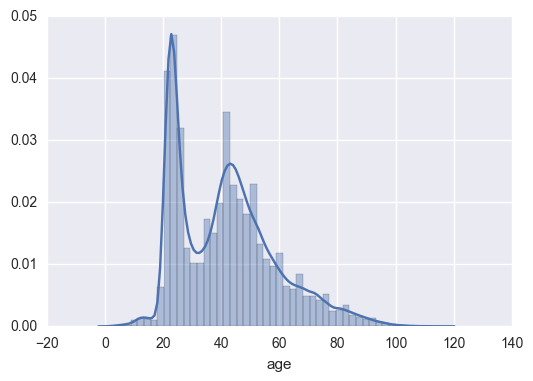

In [9]:
sns.distplot(data_cut["age"].dropna())

The age distribution seems to be bimodal.

In [10]:
data["ind_nuevo"].isnull().sum()

27734

In [11]:
#cleaning the data
month_active = data.loc[data["ind_nuevo"].isnull(),:].groupby("ncodpers", sort = False).size()
print month_active.max()

6


In [12]:
# 6 < 17 - new customers
data.loc[data["ind_nuevo"].isnull(),"ind_nuevo"] = 1
#data["ind_nuevo"].isnull().sum()

In [13]:
data["fecha_alta"].isnull().sum()
data.loc[data["fecha_alta"].isnull(),"ind_nuevo"].describe()
#it seems that these are the same people who were the new cutomers

dates=data.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
data.loc[data["fecha_alta"].isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
data["fecha_alta"].describe()

count       13647309
unique          6756
top       2014-07-28
freq           57389
Name: fecha_alta, dtype: object

In [14]:
#indrel
print data["indrel"].isnull().sum()
print pd.Series([i for i in data["indrel"]]).value_counts()

data.loc[data.indrel.isnull(),"indrel"] = 1

27734
1.0     13594782
99.0       24793
dtype: int64


In [15]:
#tipodom, cod prov - this one is the same as nomprov
print pd.Series([i for i in data["tipodom"]]).value_counts()
# doesn't seem to be useful - let's drop it
#print data["tipodom"].isnull().sum()
data.drop(["tipodom","cod_prov"],axis=1,inplace=True)

1.0    13619574
dtype: int64


In [16]:
#nowprov/renta
data.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [17]:
#ind_activated_cliente
print data["ind_actividad_cliente"].isnull().sum()
data.loc[data["ind_actividad_cliente"].isnull(),"ind_actividad_cliente"] = data["ind_actividad_cliente"].median()

27734


In [18]:
#nowprov
#data.nomprov.unique()
data.loc[data["nomprov"]=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
data.nomprov.unique()
data.loc[data["nomprov"].isnull(),"nomprov"] = "UNKNOWN"

In [19]:
#renta
data.renta.isnull().sum()
# to be more accurate let's do the median income by region to fill in the missing values
incomes = data.loc[data["renta"].notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)

In [20]:
print incomes

                   nomprov        renta
                           MedianIncome
0              CIUDAD REAL     62193.45
1                  BADAJOZ     62330.97
2                     LUGO     64390.53
3                   LERIDA     64818.45
4                CASTELLON     66630.30
5                   CUENCA     67201.41
6                 ALICANTE     67526.28
7                  CACERES     67799.49
8                   MURCIA     67813.86
9                     JAEN     67886.40
10                   AVILA     68561.28
11                  TOLEDO     68867.76
12                  HUELVA     68994.30
13                 CORDOBA     69106.89
14                VALENCIA     72988.98
15                 ALMERIA     73390.65
16                  HUESCA     73467.81
17                  ZAMORA     74692.71
18                  TERUEL     76467.57
19                ALBACETE     78657.30
20                   SORIA     78810.90
21                   CADIZ     79016.37
22                 OURENSE     79069.62


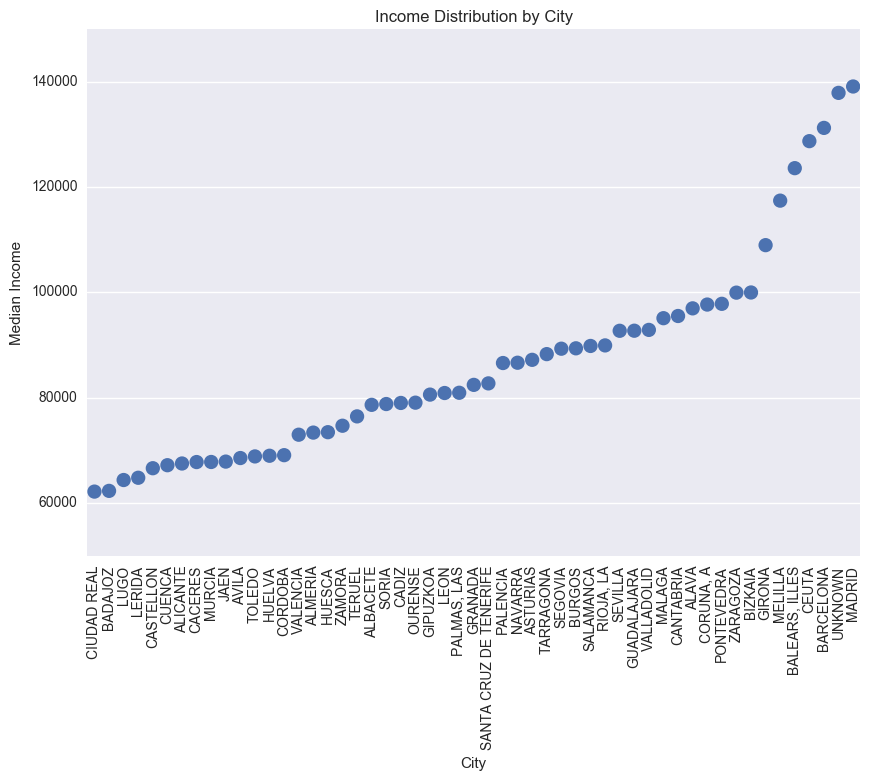

In [21]:
sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None")
plt.xticks(rotation=90)
plt.ylabel("Median Income")
plt.xlabel("City")
plt.title("Income Distribution by City")

In [22]:
grouped = data.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(data,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
data.sort_values("nomprov",inplace=True)
data = data.reset_index()
new_incomes = new_incomes.reset_index()
data.loc[data.renta.isnull(),"renta"] = new_incomes.loc[data.renta.isnull(),"renta"].reset_index()
data.loc[data.renta.isnull(),"renta"] = data.loc[data.renta.notnull(),"renta"].median()
data.sort_values(by="fecha_dato",inplace=True)

In [23]:
incomes = data.loc[data["renta"].notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)

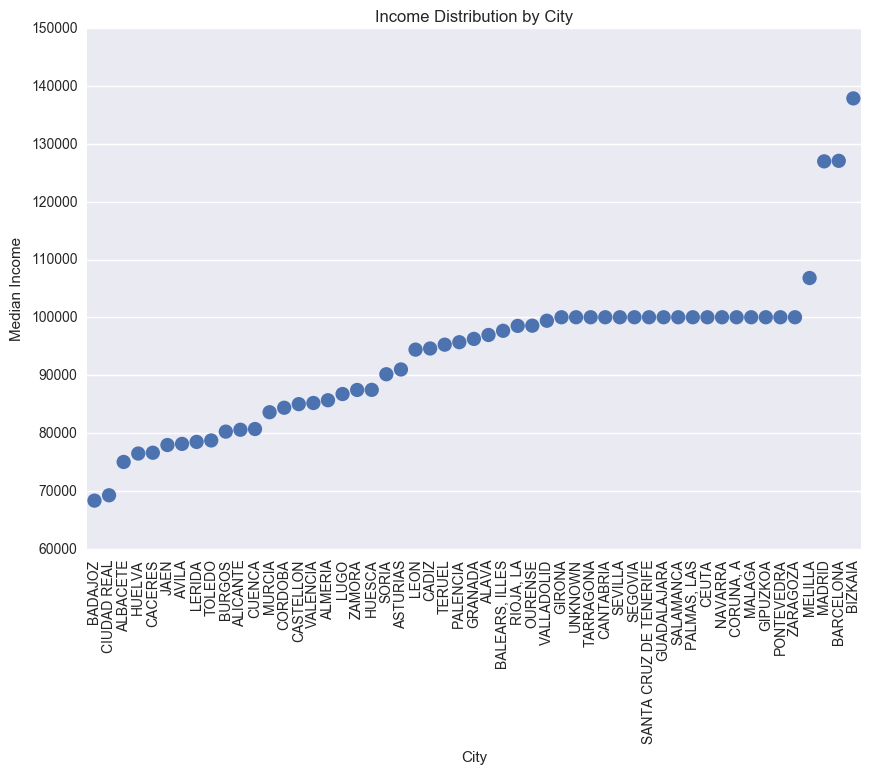

In [24]:
sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None")
plt.xticks(rotation=90)
plt.ylabel("Median Income")
plt.xlabel("City")
plt.title("Income Distribution by City")

In [25]:
#ind_nomina_ult1/ind_nom_pens_ult1
data["ind_nomina_ult1"].isnull().sum()
data["ind_nom_pens_ult1"].isnull().sum()
data.loc[data.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
data.loc[data.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [26]:
#now we have cleaned up the features with float64 type, let's clean the object type
string_data = data.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' 'B' 'A' 'F' nan 'S']

Unique values for pais_residencia:
['ES' nan 'AU' 'FR' 'DE' 'AT' 'EC' 'AR' 'CM' 'GR' 'SE' 'IT' 'CH' 'IE' 'CU'
 'IL' 'UY' 'GA' 'BE' 'CA' 'RO' 'GE' 'US' 'RU' 'CO' 'MX' 'GB' 'NL' 'AD' 'CI'
 'BG' 'VE' 'PE' 'PL' 'DZ' 'BR' 'PT' 'TH' 'CL' 'KE' 'TR' 'MA' 'UA' 'SK' 'ZA'
 'PA' 'FI' 'DK' 'CD' 'CN' 'PR' 'KR' 'DO' 'GQ' 'EG' 'HR' 'JP' 'MR' 'NG' 'TN'
 'QA' 'HN' 'MD' 'AO' 'BO' 'IN' 'BY' 'NO' 'PH' 'AE' 'SG' 'PY' 'BZ' 'VN' 'GH'
 'CZ' 'HK' 'LU' 'CR' 'PK' 'LY' 'LT' 'GT' 'NI' 'BA' 'TG' 'SV' 'SA' 'LB' 'RS'
 'KW' 'SN' 'MK' 'ML' 'CG' 'GN' 'TW' 'IS' 'GW' 'HU' 'EE' 'MZ' 'NZ' 'AL' 'ET'
 'LV' 'OM' 'GM' 'MM' 'KZ' 'KH' 'CF' 'GI' 'SL' 'ZW' 'DJ' 'JM' 'BM' 'MT']

Unique values for sexo:
['V' 'H' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-08' '2015-07-03' '2015-07-07' '2015-07-21' '2015-07-22'
 '2015-07-28' '2015-07-15' '2015-07-10' '2015-07-24' '2015-07-13'
 '2015-07-17' '2015-07-02' '2015-07-27' '2015-07-01' '2015-07-09'
 '2015-07-30' '2015-07-29' 

In [27]:
# fill in with the most common values or creating unknowns
data.loc[data["indfall"].isnull(),"indfall"] = "N"
data.loc[data["tiprel_1mes"].isnull(),"tiprel_1mes"] = "A"
#data["tiprel_1mes"] = data.tiprel_1mes.astype("category")

data["indrel_1mes"].fillna("P",inplace=True)
#df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    data.loc[data[col].isnull(),col] = "UNKNOWN"

In [28]:
data.isnull().any()
#data.info()
data["age"]   = pd.to_numeric(data["age"], errors="coerce")

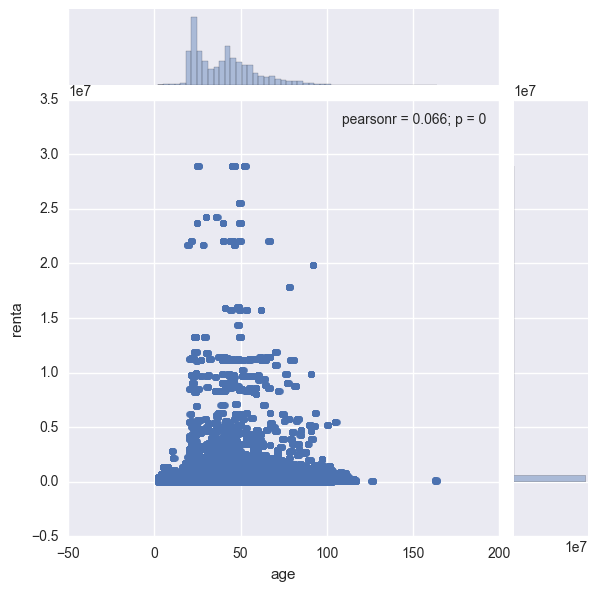

In [30]:
sns.jointplot(x="age",y="renta",data=data)